In [170]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# read data

In [36]:
data = []
data.append(np.array(pd.read_csv('boys_bad.csv'))) # 0
data.append(np.array(pd.read_csv('boys_coffee.csv'))) # 1
data.append(np.array(pd.read_csv('boys_nan.csv'))) # 2

data.append(np.array(pd.read_csv('girls_bad.csv'))) # 3
data.append(np.array(pd.read_csv('girls_coffee.csv'))) # 4
data.append(np.array(pd.read_csv('girls_nan.csv'))) # 5
data = np.array(data)

# compute std and mean for each test

In [35]:
tests_std = []
tests_mean = []
for i in range(len(data[0][0])):
    tests_std.append([])
    tests_mean.append([])
    for j in range(len(data)):
        tests_std[len(tests_std)-1].append(np.std(data[j,:,i]))
        tests_mean[len(tests_mean)-1].append(np.mean(data[j,:,i]))
tests_mean = np.array(tests_mean)
tests_std = np.array(tests_std)

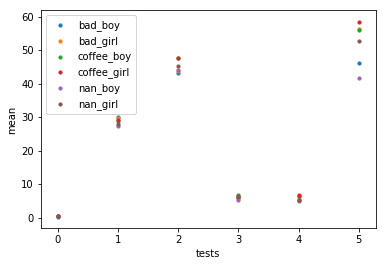

In [114]:
bad_m = tests_mean[:,[0,3]]
coffee_m = tests_mean[:,[1,4]]
nan_m = tests_mean[:,[2,5]]

bad_s = tests_std[:,[0,3]]
coffee_s = tests_std[:,[1,4]]
nan_s = tests_std[:,[2,5]]

a = 10
time = np.arange(6)
plt.scatter(time, bad_m[:, 0], s = a)
plt.scatter(time, bad_m[:, 1], s = a)
plt.scatter(time, coffee_m[:, 0], s = a)
plt.scatter(time, coffee_m[:, 1], s = a)
plt.scatter(time, nan_m[:, 0], s = a)
plt.scatter(time, nan_m[:, 1], s = a)
plt.xlabel(('tests'))
plt.ylabel(('mean'))
plt.legend(['bad_boy', 'bad_girl', 'coffee_boy', 'coffee_girl', 'nan_boy', 'nan_girl'])
plt.show()

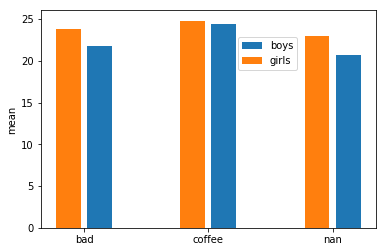

In [119]:
time = np.array([1, 5, 9])
plt.bar(time+1,[np.mean(bad_m[:,0]), np.mean(coffee_m[:,0]),np.mean(nan_m[:,0])])
plt.bar(time,[np.mean(bad_m[:,1]), np.mean(coffee_m[:,1]), np.mean(nan_m[:,1])])
plt.legend(('boys', 'girls'),bbox_to_anchor=(0.78, 0.9))
plt.xticks([1.5, 5.5, 9.5], ('bad', 'coffee', 'nan'))
plt.ylabel('mean')
plt.show()

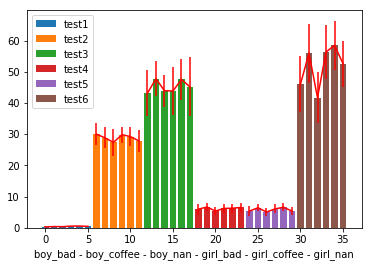

In [179]:
mean = data.mean(axis=1).T.flatten()
std = data.std(axis=1).T.flatten()
for i in range(0, len(mean), 6):
    time = np.linspace(i, i+5, 6)
    plt.bar(time, mean[i:i+6])
    
plt.legend(('test1','test2', 'test3', 'test4', 'test5', 'test6'))
for i in range(0, len(mean), 6):
    time = np.linspace(i, i+5, 6) 
    plt.errorbar(time, mean[i:i+6], std[i:i+6], c ='red')
plt.xlabel('boy_bad - boy_coffee - boy_nan - girl_bad - girl_coffee - girl_nan')
plt.show()

In [174]:
for test in range(6):
    for position1 in range(6):
        for position2 in range(6):
            if position1 != position2:
                f, p = stats.ttest_ind(data[position1,:,test], data[position2,:,test])
                print(f, p)

-1.8945187740545193 0.07026759479795583
-1.4032719345576123 0.17334192818780977
-3.7896481663547217 0.0008949964545781962
-5.052659366734311 3.6377684734373254e-05
-2.51940029718642 0.01882219835104372
1.8945187740545193 0.07026759479795583
0.6691297899120198 0.5097987818266855
-2.422755535758559 0.023316478896185523
-3.8282504655199134 0.0008123105845000365
-1.0526846817948583 0.3029693012163182
1.4032719345576123 0.17334192818780977
-0.6691297899120198 0.5097987818266855
-3.0741323661449367 0.005200102004611107
-4.833057132897509 6.349373313404217e-05
-1.5986754442606903 0.12297636155368621
3.7896481663547217 0.0008949964545781962
2.422755535758559 0.023316478896185523
3.0741323661449367 0.005200102004611107
-0.49484847585285247 0.6252069810986693
1.0410653946514588 0.30821970830353357
5.052659366734311 3.6377684734373254e-05
3.8282504655199134 0.0008123105845000365
4.833057132897509 6.349373313404217e-05
0.49484847585285247 0.6252069810986693
1.6827220162149894 0.10539542081613855
2